# Intro to Programming III: For loops, numpy arrays, and image analysis

Today, we will be introducing the data type: **numpy arrays**. Numpy arrays are used to store and compute matrices (=tables with numbers). Numpy arrays have many applications, one of which is digital images.

In this lecture, we will:

* Learn the digital images are matrices
* Introduce for loops and indexing in numpy arrays
* Interact with various images in Python
  * gray scale images
  * color images
  * 3d images
* Image analysis - counting the number of cells in a microscope image


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt # for plotting and displaying images
import skimage # for image analysis operations
import requests, zipfile # for downloading example image files

# Part 0: For loops

In [2]:
# recall the data structure - list
animals = ['cat', 'dog', 'deer', 'cow', 'pig', 'ground hog', 'chipmunk']
animals

['cat', 'dog', 'deer', 'cow', 'pig', 'ground hog', 'chipmunk']

In [3]:
# How many elements are in this list?
N = len(animals)
N

7

## Using "For loops" to print the elements of a list and an n-d array


In [4]:
# Approach 1: using the range object
range(N)

range(0, 7)

In [5]:
# for loop, where i increases by +1 for each iteration of hte loop
for i in range(N):
  print(i)
  # print(animals[i])

0
1
2
3
4
5
6


In [6]:
# Approach 2: the pythonic approach to loops
for animal in animals:
  print(animal)

cat
dog
deer
cow
pig
ground hog
chipmunk


In [7]:
# numpy arrays are also iterable

myarray = np.array([1,2,3,4,5,6])
myarray


array([1, 2, 3, 4, 5, 6])

In [8]:
for element in myarray:
  print(element)

1
2
3
4
5
6


In [9]:
# numpy arrays can be 1, 2, 3, ... n dimensional
my2darray = np.array([[1,2,3,4], [5,6,7,8]])
my2darray

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
for element in my2darray:
  print(element)

[1 2 3 4]
[5 6 7 8]


In [11]:
# using a nested for loop to print

## Indexing for numpy arrays

In [12]:
myarray

array([1, 2, 3, 4, 5, 6])

In [13]:
# 3rd element onwards
myarray[3:]

array([4, 5, 6])

In [14]:
# up to 3rd element
myarray[:3]

array([1, 2, 3])

In [15]:
# last element
myarray[-1]

6

In [16]:
# skip every other (increment by 2)
myarray[::2]

array([1, 3, 5])

In [17]:
my2darray

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [18]:
# print the element in 1st row, 2nd column
my2darray[1,2]

7

In [19]:
# 1st row, skip every other column
my2darray[1,::2]

array([5, 7])

# Part 1: Images are numbers arranged as a matrix!

array([[202, 203, 202, ..., 130, 112, 103],
       [220, 206, 205, ...,  82, 121, 118],
       [214, 195, 196, ...,  62,  69, 148],
       ...,
       [201, 195, 205, ..., 140, 138, 143],
       [195, 200, 188, ..., 142, 146, 142],
       [191, 183, 195, ..., 160, 158, 155]], dtype=uint8)
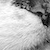

In [20]:
# Klea's nose is bunch of numbers
nose = skimage.io.imread('kleaNose_bw.tif')
nose

In [21]:
# use numpy save text to save the numpy array nose as csv file with integer formatting
np.savetxt('nose.csv', nose, delimiter=',', fmt='%d')


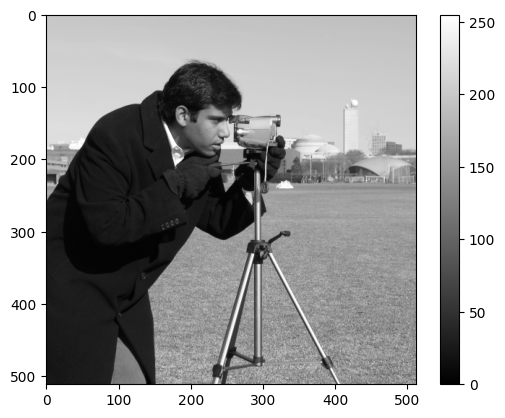

In [22]:
# Load an example image from skimage
image = skimage.data.camera()

# Display the image
plt.imshow(image, cmap='gray')
plt.colorbar(orientation='vertical')
# plt.axhline(y=100, color='r') # draws a red horizontal line at 100
plt.show()


In [23]:
# what is the data type?
type(image)

numpy.ndarray

In [24]:
# what is the shape?
image.shape

(512, 512)

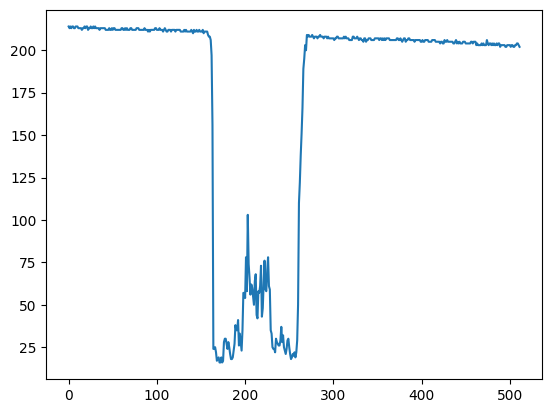

In [25]:
# plotting an intensity profile at y=100
plt.plot(image[100])

(70, 80)


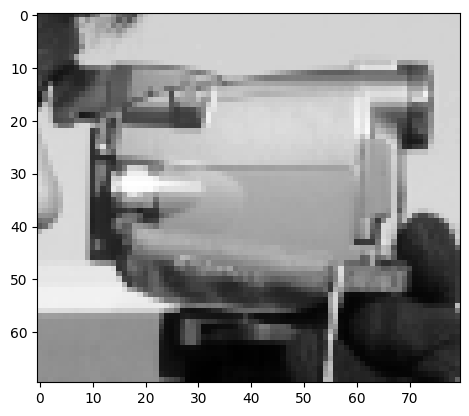

In [26]:
# cropping the region of the camera
plt.imshow(image[130:200, 250:330], cmap='gray')
print(image[130:200, 250:330].shape)

## Exercise 1:
Using Numpy functions, find the average, minimum, and maximum value contained in the image.

# Part 2: Color images are composed of multiple 2D matrices corresponding to Red, Green, and Blue

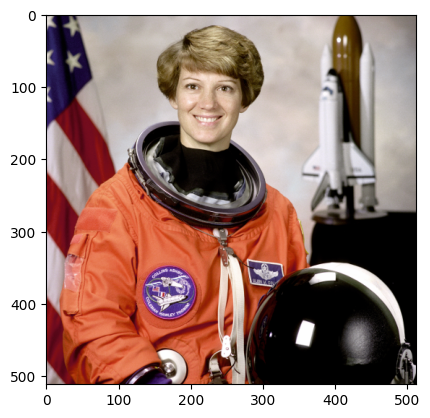

(512, 512, 3)


In [27]:
# Load an example of a colored image
image = skimage.data.astronaut()

# Display the image
plt.imshow(image)
plt.show()

print(image.shape)

Text(0.5, 1.0, 'blue')

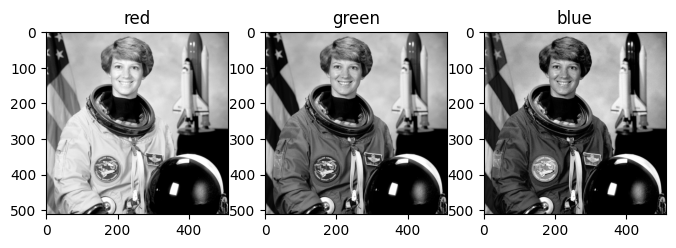

In [28]:
# Split the image into its different channels
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

# Display the individual channels
fig, axs = plt.subplots(1,3, figsize=(8,4))
axs[0].imshow(red, cmap='gray')
axs[0].set_title('red')
axs[1].imshow(green, cmap='gray')
axs[1].set_title('green')
axs[2].imshow(blue, cmap='gray')
axs[2].set_title('blue')

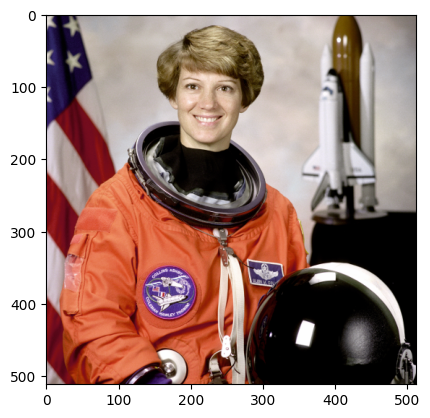

In [29]:
# Combine the three channels into a single numpy array
image_rgb = np.stack((red, green, blue), axis=-1)

# Display the combined image
plt.imshow(image_rgb)
plt.show()

## Exercise 2: Display a new image of the astronaut where the channels are rearranged

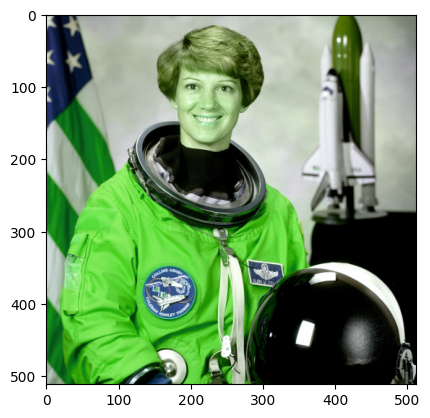

In [30]:
# Combine the three channels into a single numpy array
image_rgb = np.stack((green, red, blue), axis=-1)

# Display the combined image
plt.imshow(image_rgb)
plt.show()

# Part 3: For loops and 3d images

## Using "For loops" to interact with 3D images

First, we download and unzip a cool example 3d image - a MRI scan of a human head.

In [31]:
# Step 1: Specify the URL
url = "https://imagej.net/ij/images/mri-stack.zip"
# Step 2: Download the file
response = requests.get(url)
file_name = "mri-stack.zip"

# Step 3: Save the file locally
with open(file_name, "wb") as file:
    file.write(response.content)

# Step 4: Extract the ZIP file
with zipfile.ZipFile(file_name) as zip_ref:
    zip_ref.extractall("mri-stack")  # Extract to a folder named "mri-stack"

# Verify the extraction
extracted_files = os.listdir("mri-stack")
print("Extracted files:", extracted_files)


Extracted files: ['mri-stack.tif']


In [32]:
image3d = skimage.io.imread('mri-stack/mri-stack.tif')
image3d.shape

(27, 226, 186)

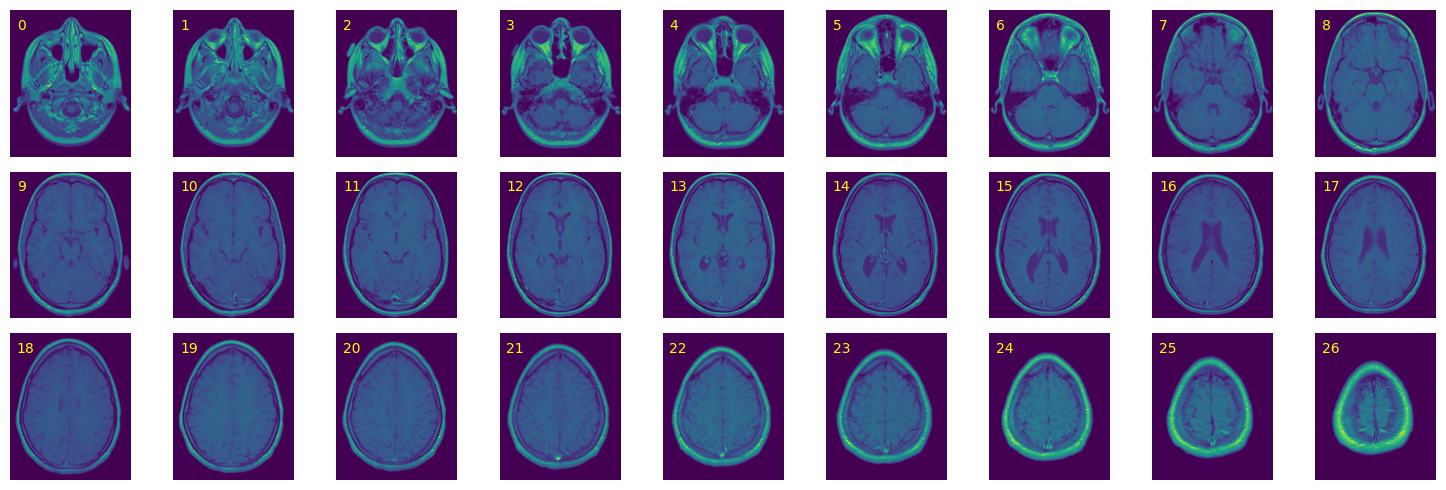

In [33]:
# we know that there are 27 planes in this 3d image
# use a for loop to plot every slice of the 3D image as separate panels

fig, axs = plt.subplots(3, 9, figsize=(15, 5))

N = len(image3d)

for i in range(N):
  axs.ravel()[i].imshow(image3d[i])
  axs.ravel()[i].text(10,30, i, color='yellow')
  axs.ravel()[i].axis('off')
fig.tight_layout()

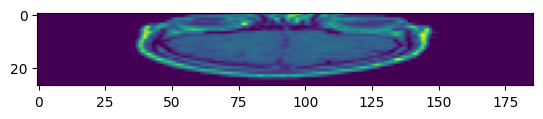

In [34]:
# can you use numpy slicing to create a "side view" of the MRI image??

plt.imshow(image3d[:, 30, :])

# Part 4: Image segmentation and quantitative analysis

We will use data acquired in the Ishihara lab. These are CT26 cells (mouse colon cancer cells) stained for DNA and imaged on a fluorescence microscope.

In [35]:
image = skimage.io.imread('cells_treated.tif')
image.shape

(800, 800)

## Step 1: Pre-processing of image

Pre-processing of images is done to increase the robustness of image analysis. Here we apply a Gaussian filter to lightly smooth the image.

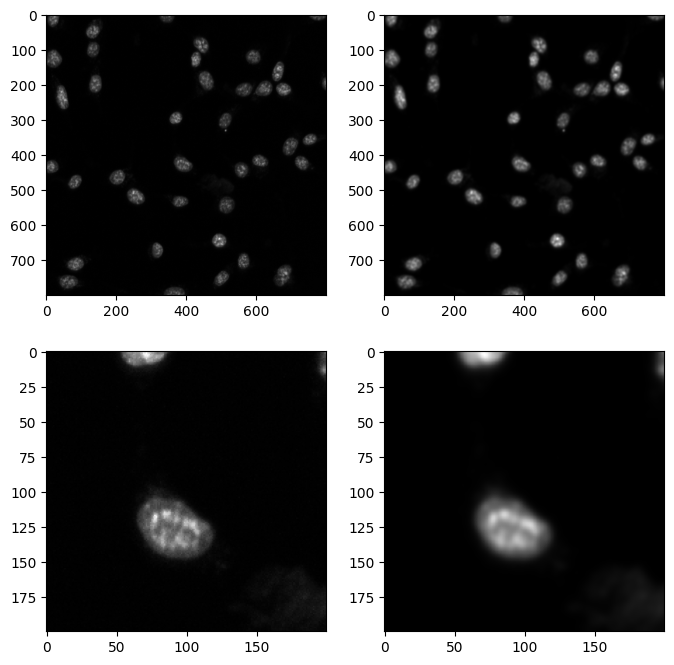

In [36]:
# apply gaussian filter
filtered = skimage.filters.gaussian(image, sigma=2, preserve_range=True)

# display the original and the filtered image
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 1].imshow(filtered, cmap='gray')
axs[1, 0].imshow(image[300:500, 300:500], cmap='gray')
axs[1, 1].imshow(filtered[300:500, 300:500], cmap='gray')
plt.show()


Can you see that the image is blurred after filtering? We can see this effect quantitatively by plotting a line profile.

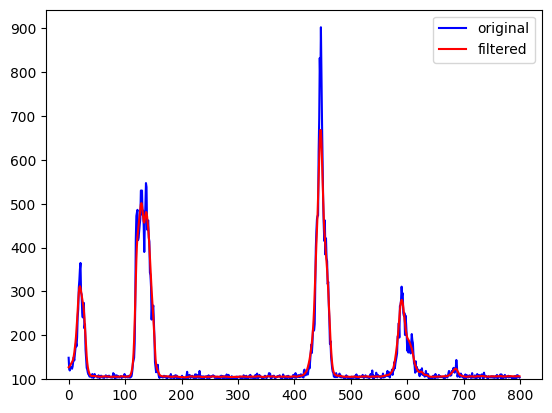

In [37]:
plt.plot(image[100], color='blue', label='original')
plt.plot(filtered[100], color='red', label='filtered')
plt.legend()
plt.ylim(bottom=100);

## Step 2: Image binarization and segementation

We now wish to classify every pixel as:
1. Belonging to a cell
2. or not

the resulting image is a binary array, where all pixels take the value of True or False (boolean).

We can do this by asking if each pixel is above a certain threshold value. Based on the line profile above, a reasonable threshold might be the intensity value of 180.

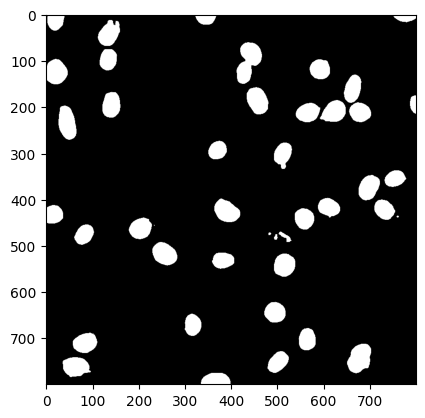

In [38]:
mythreshold = 180
binary = (filtered > mythreshold)
plt.imshow(binary, cmap='gray')

In practice, we want a method to automatically determine the threshold. The Otsu method is a commonly used approach.

291.83527967883816


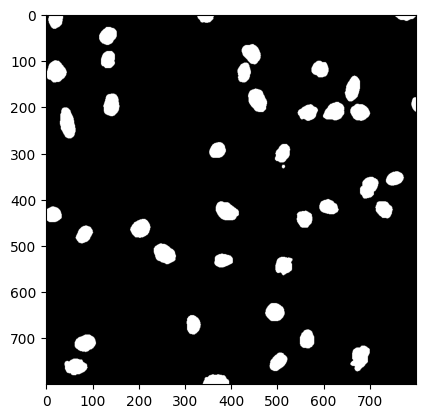

In [39]:
# Binarize the image using Otsu threshold
threshOtsu = skimage.filters.threshold_otsu(filtered)
print(threshOtsu)

binary = filtered > threshOtsu
plt.imshow(binary, cmap='gray')


Now we distinguish the different objects based on the connectivity of the True (white) pixels in the binary image. This is called labeling.

40


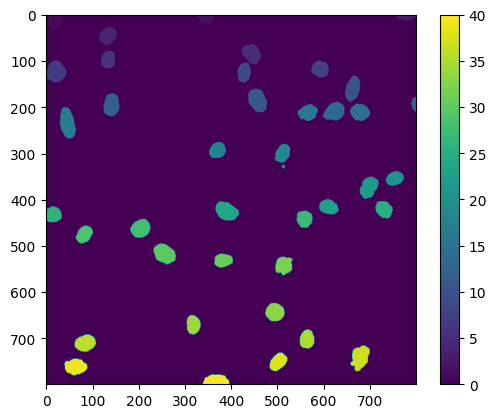

In [40]:
# Label the image using scikit image
labeled = skimage.measure.label(binary)

plt.imshow(labeled)
plt.colorbar(orientation='vertical')

# how many objects are there?
print(labeled.max())

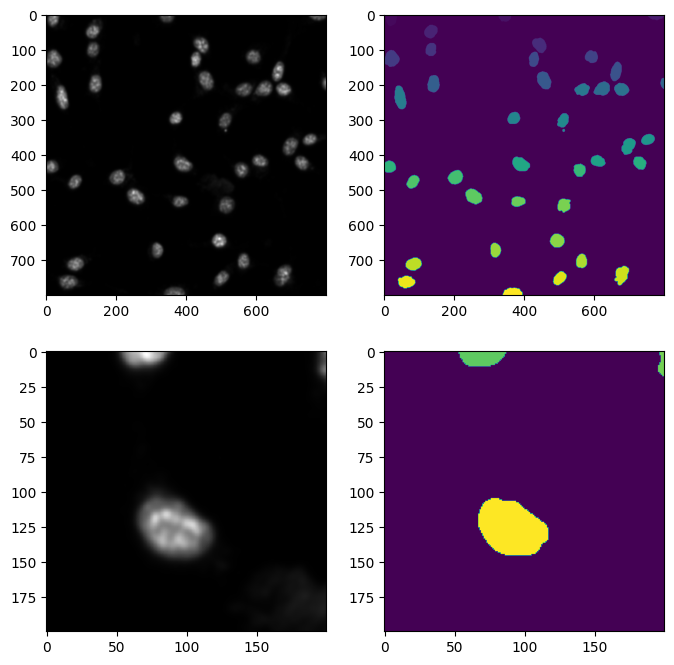

In [41]:
# display the filtered and the labeled image
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0, 0].imshow(filtered, cmap='gray')
axs[0, 1].imshow(labeled)
axs[1, 0].imshow(filtered[300:500, 300:500], cmap='gray')
axs[1, 1].imshow(labeled[300:500, 300:500])
plt.show()

## Step 3: Measuring nuclear area

The area of an object is defined as the number of pixels that the object occupies.

In [42]:
# Approach 1: Loop through all the labels and
areas = []
for i in range(1, np.max(labeled)+1):
  area = np.sum(labeled == i)
  areas.append(area)

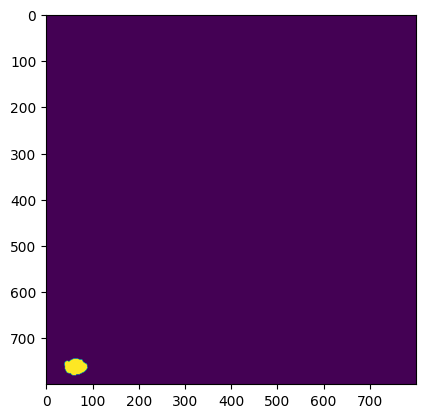

In [43]:
plt.imshow(labeled==39)

In [45]:
# Approach 2: using np.unique, this counts how many
___, areas = np.unique(labeled, return_counts=True)

In [46]:
# Approach 3: Using scikit image to quantify the areas
areas = []
for i in range(np.max(labeled)):
  area = skimage.measure.regionprops(labeled)[i].area
  areas.append(area)


Note the there are many properties that `regionprops` can measure for objects. For example:
- perimeter
- circularity
- center of mass (centroid)

See https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops.


# Bonus: Can you tell if the nuclear area is different in cells_control.tif vs. cells_treated.tif?

In [47]:
# define the function for repeated use

def measureNuclearArea(filename):

  image = skimage.io.imread(filename)
  filtered = skimage.filters.gaussian(image, sigma=2, preserve_range=True)
  threshOtsu = skimage.filters.threshold_otsu(filtered)
  binary = filtered > threshOtsu
  labeled = skimage.measure.label(binary)

  areas = []
  for i in range(1, np.max(labeled)+1):
    area = np.sum(labeled == i)
    areas.append(area)

  return np.array(areas)

In [48]:
areas_control = measureNuclearArea('cells_control.tif')
areas_treated = measureNuclearArea('cells_treated.tif')

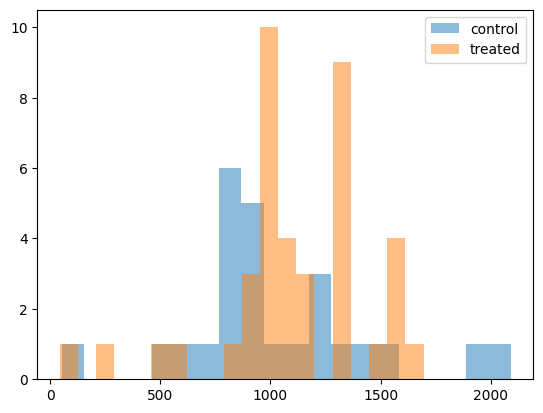

In [49]:
# plot the distributions
plt.hist(areas_control, bins=20, alpha=0.5, label='control')
plt.hist(areas_treated, bins=20, alpha=0.5, label='treated')
plt.legend()

In [50]:
areas_control.mean(), areas_treated.mean()

(1022.6, 1100.45)

In [51]:
# apply t-test to calculate the p-value
from scipy.stats import ttest_ind

ttest_ind(areas_control, areas_treated)

TtestResult(statistic=-0.8061084567080957, pvalue=0.42321275615150944, df=63.0)